### Initial setup

In [250]:
#http://puzzles.bostonpython.com/hinomaru.html
import os, sys, random, time, math

def recurse_dims(obj):
    try:
        next = obj[:]
    except:
        return []
    dims = []
    for i in range(1000):
        try:
            if len(next) > 0:
                dims.append(len(next))
            else:
                break
        except:
            break            
        next = next[0]
    return dims

SOLUTION = [
    (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),
    (0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0),
    (0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0),
    (0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0),
    (0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0),
    (0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0),
    (0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0),
    (0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0),
    (0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0),
    (0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0),
    (0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0),
    (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),
]

TILES = [
    (
        ((1,1,1,1,1,1), (1,1,1,1,1,1), (1,1,1,1,1,1)),
        ((0,1,1,1,1,1), (0,1,1,1,1,1), (0,0,1,1,1,1)),
    ),
    (
        ((1,1,1,1,1,1), (1,1,1,1,1,1), (1,1,1,1,1,1)),
        ((1,1,0,0,0,0), (1,1,0,0,0,0), (1,0,0,0,0,0)),
    ),
    (
        ((1,1,1,1,1,1), (1,1,1,1,1,1), (1,1,1,1,1,1)),
        ((0,0,0,0,0,0), (1,1,0,0,0,0), (1,1,1,1,0,0)),
    ),
    (
        ((1,1,1,1,1,1), (0,1,1,1,1,0), (0,0,0,0,0,0)),
        ((1,1,1,1,0,0), (1,1,0,0,0,0), (0,0,0,0,0,0)),
    ),
    (
        ((1,1,1,1,1,1), (0,1,1,1,1,0), (0,0,0,0,0,0)),
        ((0,0,0,0,0,0), (0,0,0,0,0,0), (0,0,0,0,0,0)),
    ),
    (
        ((1,1,1,1,1,0), (1,1,1,1,1,0), (1,1,1,1,0,0)),
        ((0,0,0,0,0,0), (0,0,0,0,0,0), (1,0,0,0,0,0)),
    ),
    (
        ((1,1,1,1,0,0), (1,1,1,1,1,0), (1,1,1,1,1,0)),
        ((0,0,1,1,1,1), (0,0,0,0,1,1), (0,0,0,0,0,0)),
    ),
    (
        ((0,0,0,0,0,0), (0,0,0,0,1,1), (0,0,1,1,1,1)),
        ((0,0,0,0,0,0), (0,0,0,0,0,0), (0,0,0,0,0,0)),
    ),
    (
        ((0,0,1,1,1,1), (0,0,0,0,1,1), (0,0,0,0,0,0)),
        ((0,0,0,0,0,0), (0,0,0,0,0,0), (0,0,0,0,0,1)),
    ),
    (
        ((0,0,0,0,1,1), (0,0,0,0,1,1), (0,0,0,0,0,1)),
        ((0,0,0,0,0,0), (0,0,0,0,0,0), (0,0,0,0,0,0)),
    ),
    (
        ((0,0,0,0,0,1), (0,0,0,0,1,1), (0,0,0,0,1,1)),
        ((0,0,0,0,0,0), (0,0,0,0,0,0), (0,0,0,0,0,1)),
    ),
    (
        ((0,0,0,0,0,1), (0,0,0,0,0,0), (0,0,0,0,0,0)),
        ((0,0,0,0,0,0), (0,0,0,0,0,0), (0,0,0,0,0,0)),
    ),
]


In [251]:
#http://puzzles.bostonpython.com/hinomaru.html
import os, sys, random, time, math

In [252]:
t, s = TILES, SOLUTION

### DIMENSIONS of t, s

In [253]:
print recurse_dims(t), recurse_dims(s)
_TILES, _SIDES,_TYVECS, _TXDOTS = recurse_dims(t)
_SYVECS, _SXDOTS = recurse_dims(s)

[12, 2, 3, 6] [12, 18]


### modxyz: all the ways to arrange 3x6 tiles on the board

In [254]:
def mod(dims,solution):
    return filter(lambda p: any( map(lambda dim: (p) % (dim) == 0,dims) ), \
                  range(0,solution) )

In [255]:
modx = mod((_TXDOTS,_TYVECS),_SXDOTS)
mody = mod((_TXDOTS,_TYVECS),_SYVECS)
print modx, mody

[0, 3, 6, 9, 12, 15] [0, 3, 6, 9]


In [256]:
# z: orientation => 0: stout, 6longx3high ; 1: tall: 3longx6high
modxy = [(x,y) for x in modx for y in mody]
modxyz = [(a[0],a[1],b) for a in modxy for b in range(2)]
print modxyz[:4]
len(modxyz)

[(0, 0, 0), (0, 0, 1), (0, 3, 0), (0, 3, 1)]


48

### combos - map each tile to a  {side, flip, xyz in {modxyz}}

In [257]:
#combos: all combinations of    indt-"tile-code", tileside - "heads/tails", 
#                               xy - "topleft coord", z - "tall/stout" ,
#                               flip-"0flip/180flip"
combos = [(tile, flip,tileside,xyz,indt) for flip in range(2) for tileside in range(2) for xyz in modxyz for indt,tile in enumerate(t)]
len(combos)

2304

###  match combos against s if its a match goes into valid

In [258]:
def tilemark(tx,xx,yy,zz,ff):
    #if flip = -1 -> y can be bigger than x
    flip = -1 if ff else 1
    tt = [x[::flip] for x in tx[::flip]]
    if not(zz):
        out = tt[yy][xx]
    else:    
        out = tt[2-xx][yy]
    return out

def matchtile(tile,flip,xyz):
    x,y,z = xyz[0], xyz[1], xyz[2]
    r0, r1 = range(3), range(6)
    xiter, yiter = (r0,r1) if z else (r1,r0)
    try:
        out = all( [s[y+ y0][x + x0] == tilemark(tile,x0,y0,z,flip) for x0 in xiter for y0 in yiter])
        return out
    except:
        return False #error occurs because some shapes are bigger than smallest mod

In [259]:
#View and understand the existing data structures

combo1 = combos[0]
print 'combo1:'
print combo1

t1 = combo1[0][1] #note:double indexed for [tile-data][tile-side]
print 't1, tile-data:'
print t1

f1,z1 = combo1[3],combo1[4]
tmark1 = [ (x,y,tilemark(t1,x,y,f1,z1)) for x in xrange(3) for y in xrange(3)]
print 'tmark over a x,y range: '
print tmark1   #notice tilemark doesn't use the position from combo, only the by given x,y index

#check flip
tmarkA = [ tilemark(t1,x,y,0,z1) for x in xrange(3) for y in xrange(3)]
tmarkB = [ tilemark(t1,x,y,1,z1) for x in xrange(3) for y in xrange(3)]
print tmarkA
print tmarkB

print 'out of bounds, when stout y < 3'
try:
    tilemark(t1,2,4,0,0) #tile,x,y,z,flip
except:
    print 'nope'
print 'yep, ', tilemark(t1,2,4,1,0)  # y <6, when z=1

#Check matchtile
t0 = TILES[0][0]
e2 = matchtile(t0,0,(0,0,0))            #doesn't match topleft
print 'e1: ', e1

e2 = matchtile(t0,0,(4,4,0))            #matches middle of circle
print 'e2: ', e2

e3 = matchtile(t0,0,(4,4,1))            #...but not when z = talll
print 'e3: ', e3

combo1:
((((1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1)), ((0, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1))), 0, 0, (0, 0, 0), 0)
t1, tile-data:
((0, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1))
tmark over a x,y range: 
[(0, 0, 0), (0, 1, 0), (0, 2, 1), (1, 0, 0), (1, 1, 1), (1, 2, 1), (2, 0, 0), (2, 1, 1), (2, 2, 1)]
[0, 0, 0, 1, 1, 0, 1, 1, 1]
[0, 0, 1, 0, 1, 1, 0, 1, 1]
out of bounds, when stout y < 3
nope
yep,  1
e1:  False
e2:  True
e3:  False


In [273]:
#valid: if matchtile returns true, tile t, with params p matches to solution mat
valid = filter(lambda i: matchtile(i[0][i[2]],i[1],i[3]), combos)   #THE BUG! this flips
len(valid)

126

In [274]:
#Which tilenum it uses 0 -11
tts = map(lambda x: x[4],valid)
print tts

from collections import Counter
ctts = Counter(tts)
print ctts
kk = ctts.keys()
print kk
print [(k, ctts[k]) for k in kk]   #tilenum4 is used most often

[10, 9, 11, 7, 8, 3, 4, 8, 0, 1, 2, 0, 1, 2, 0, 1, 2, 5, 3, 4, 6, 0, 1, 2, 5, 6, 7, 8, 10, 4, 7, 9, 11, 4, 7, 9, 11, 4, 7, 9, 11, 6, 0, 3, 6, 0, 2, 3, 5, 1, 2, 4, 7, 9, 11, 4, 7, 9, 11, 4, 7, 9, 11, 5, 6, 7, 3, 4, 6, 0, 1, 2, 0, 1, 2, 0, 1, 2, 8, 5, 0, 1, 2, 7, 11, 9, 3, 4, 10, 8, 4, 7, 9, 11, 1, 4, 7, 9, 11, 4, 7, 9, 11, 5, 3, 2, 2, 6, 0, 0, 3, 6, 8, 10, 4, 7, 9, 11, 4, 7, 9, 11, 4, 7, 9, 11]
Counter({4: 16, 7: 16, 9: 14, 11: 14, 0: 12, 2: 12, 1: 10, 3: 8, 6: 8, 5: 6, 8: 6, 10: 4})
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[(0, 12), (1, 10), (2, 12), (3, 8), (4, 16), (5, 6), (6, 8), (7, 16), (8, 6), (9, 14), (10, 4), (11, 14)]


### valid2 = valid + xy position covered on canvas

In [262]:
#x,y = (0,3)  18*3 + 0 = 54, which is where it starts, 

In [275]:
#valid2: (tile, flip,tileside,xyz,indt, (xyt's))
def v2xy(v):
    x,y,z = v[3][0], v[3][1], v[3][2]
    _xr, _yr = (_TYVECS, _TXDOTS) if z else (_TXDOTS, _TYVECS)
    xy = [(xx + x, yy + y) for xx in range(_xr) for yy in range(_yr)]
    return xy

def xy2code(xy):
    x,y = xy[0],xy[1]
    return (y*_SXDOTS)+x   #numbering across, then down

def xyt(info_obj):
    return tuple(map(xy2code,v2xy(info_obj)))

print valid[0][3]   
print xyt(valid[0])    

(0, 3, 0)
(54, 72, 90, 55, 73, 91, 56, 74, 92, 57, 75, 93, 58, 76, 94, 59, 77, 95)


In [276]:
valid2 = map(lambda v: ( v[0], v[1], v[2], v[3],v[4], xyt(v) ) ,valid)
valid2[0]

((((0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 1, 1)),
  ((0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 1))),
 0,
 0,
 (0, 3, 0),
 10,
 (54, 72, 90, 55, 73, 91, 56, 74, 92, 57, 75, 93, 58, 76, 94, 59, 77, 95))

### are any of these plays off the board?

In [111]:
print _SYVECS, _SXDOTS

12 18


In [112]:
def xy2validate(xy):
    x,y = xy[0],xy[1]
    if (x >= _SXDOTS) or (y >= _SYVECS):
        return False
    return True

def xyt_validate(info_obj):
    return tuple(map(xy2validate,v2xy(info_obj)))

valid2b = map(lambda v: (xyt_validate(v),v) ,valid2)
valid2b = filter(lambda v: all(v[0]) ,valid2b)
valid2b = map(lambda v: v[1],valid2b)
len(valid2b)    # Looks good, none of the xys of any tile exceeds the board

126

In [138]:
#all the bottom tiles are stout, so they dont go off the board
yy = 9
yyv = filter(lambda v: v[3][1] == yy ,valid2)
map(lambda v: v[3],yyv)

[(0, 9, 0),
 (3, 9, 0),
 (6, 9, 0),
 (6, 9, 0),
 (9, 9, 0),
 (3, 9, 0),
 (9, 9, 0),
 (0, 9, 0),
 (3, 9, 0),
 (12, 9, 0),
 (12, 9, 0)]

### now for each v in valid, strikeout incompatible plays in valid2


In [277]:
# each v in valid will strike out a portion of other v's
# -> so we can update strikeout vec as union of preproc's stikeouts

def strikeout(x):    
    valid3 = [(i,v) for i,v in enumerate(valid2)]
    tile_i, xy_list = valid2[x][4], valid2[x][5] 

    out1 = filter(lambda v: v[1][4] == tile_i ,valid3)
    ind1 = map(lambda v: v[0] ,out1)

    out2 = filter(lambda v:any(map(lambda xyt: xyt in xy_list ,v[1][5]) ),valid3)
    ind2 = map(lambda v: v[0] ,out2)
    
    return list( set.union(set(ind1), set(ind2) ) )

so = [[] for i in range(len(valid2))]
for i in range(len(valid2)) :
    so[i].extend(strikeout(i))
    
print so[:5]
outs = map(len,so)
print '----'
print outs
print '----'
print max(outs),min(outs)


[[0, 96, 4, 5, 6, 97, 98, 92, 88, 90, 91, 28, 29, 30, 31, 32, 33, 34, 35, 36, 41, 93, 113, 94, 105, 95, 63], [1, 5, 6, 31, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 53, 57, 61, 64, 65, 85, 92, 95, 96, 97, 98, 99, 100, 101, 102, 116, 120, 124], [65, 2, 7, 84, 100, 103, 93, 101, 32, 98, 99, 36, 37, 102, 39, 40, 106, 43, 44, 117, 54, 121, 58, 38, 125, 62], [65, 66, 3, 4, 83, 105, 68, 26, 91, 28, 30, 96, 34, 27, 100, 38, 104, 41, 67, 45, 115, 52, 119, 56, 123, 60], [0, 3, 4, 5, 6, 7, 78, 89, 27, 28, 94, 104, 41, 112, 105, 63]]
----
[27, 32, 26, 26, 16, 19, 28, 15, 28, 28, 30, 28, 28, 30, 28, 28, 30, 25, 16, 25, 27, 28, 28, 30, 27, 26, 27, 19, 18, 32, 32, 30, 30, 37, 37, 34, 35, 31, 31, 28, 28, 19, 27, 18, 17, 26, 21, 17, 20, 33, 23, 31, 31, 28, 28, 37, 37, 34, 35, 32, 32, 30, 30, 27, 27, 27, 16, 25, 26, 28, 28, 30, 28, 28, 30, 28, 28, 30, 15, 25, 28, 28, 30, 26, 26, 32, 19, 28, 27, 16, 32, 32, 30, 30, 33, 37, 37, 34, 35, 31, 31, 28, 28, 20, 17, 23, 21, 17, 27, 26, 18, 19, 19, 18, 31, 31, 28,

### Build function to search for combinations of 12 from valid2-set that win

In [278]:
def puzzle(**kwargs):
    layout = []
    struckout = []
    allv = range(len(valid2))
    log = []
    valid3 = [(i,v) for i,v in enumerate(valid2)]
    Log = kwargs.get('Log',False)
    
    for try_i in range(kwargs.get('tries',20)):

        if len(layout) == 12: 
            print 'SUCCESS:', layout
            print 'IN TRIES:', try_i
            if Log:
                return (layout,log)
            else:
                return (layout,try_i)

        if len(struckout) > 0:
            notavail = reduce(lambda x,y: x+y, struckout)
        else:
            notavail = ()
        available = [x for x in allv if x not in notavail]

        #Prune Condition: Not enough valid plays to complete puzzle.
        if len(available) < (12 - len(layout)):
            
            back = random.randint(1,len(layout))
            if kwargs.get('allback',False): back = len(layout)
            if Log: log.append([(try_i, "_BACK:", back)])
                           
            for b in range(back):
                lp = layout.pop()
                sp = struckout.pop()
                if Log: log.append([(try_i, "POP:", lp)])
                
        else:
            
            #Extend layout list with a play from available list
            r = random.sample(available,1)[0]
            layout.append(r)
            struckout.append(so[r])
            if Log: log.append([(try_i, "_APP:", len(layout), layout[:])])

    return log

ret = puzzle(tries = 20, Log=True)

In [279]:
ret

[[(0, '_APP:', 1, [125])],
 [(1, '_APP:', 2, [125, 25])],
 [(2, '_APP:', 3, [125, 25, 51])],
 [(3, '_APP:', 4, [125, 25, 51, 79])],
 [(4, '_APP:', 5, [125, 25, 51, 79, 110])],
 [(5, '_APP:', 6, [125, 25, 51, 79, 110, 35])],
 [(6, '_APP:', 7, [125, 25, 51, 79, 110, 35, 72])],
 [(7, '_APP:', 8, [125, 25, 51, 79, 110, 35, 72, 27])],
 [(8, '_BACK:', 2)],
 [(8, 'POP:', 27)],
 [(8, 'POP:', 72)],
 [(9, '_APP:', 7, [125, 25, 51, 79, 110, 35, 27])],
 [(10, '_APP:', 8, [125, 25, 51, 79, 110, 35, 27, 45])],
 [(11, '_BACK:', 2)],
 [(11, 'POP:', 45)],
 [(11, 'POP:', 27)],
 [(12, '_APP:', 7, [125, 25, 51, 79, 110, 35, 4])],
 [(13, '_APP:', 8, [125, 25, 51, 79, 110, 35, 4, 13])],
 [(14, '_BACK:', 6)],
 [(14, 'POP:', 13)],
 [(14, 'POP:', 4)],
 [(14, 'POP:', 35)],
 [(14, 'POP:', 110)],
 [(14, 'POP:', 79)],
 [(14, 'POP:', 51)],
 [(15, '_APP:', 3, [125, 25, 52])],
 [(16, '_APP:', 4, [125, 25, 52, 31])],
 [(17, '_APP:', 5, [125, 25, 52, 31, 108])],
 [(18, '_APP:', 6, [125, 25, 52, 31, 108, 12])],
 [(19, '

### Now use puzzle() to search for wins

In [280]:
%%timeit
ret = puzzle(tries = 10000, Log=True)

SUCCESS: [102, 7, 70, 25, 91, 86, 120, 113, 67, 42, 105, 48]
IN TRIES: 5397
SUCCESS: [121, 25, 30, 9, 48, 86, 105, 42, 67, 113, 101, 7]
IN TRIES: 3741
1 loops, best of 3: 1.71 s per loop


### wins - test avg performance time of function, and conserved plays

In [285]:
wins = []
for trial in range(20):
    wins.append(puzzle(tries=100000,Log = False))
    
wins    

SUCCESS: [52, 103, 18, 76, 108, 78, 125, 28, 68, 6, 50, 35]
IN TRIES: 17183
SUCCESS: [6, 89, 115, 125, 20, 45, 28, 15, 35, 103, 18, 46]
IN TRIES: 26665
SUCCESS: [46, 53, 19, 103, 15, 62, 5, 28, 20, 45, 34, 89]
IN TRIES: 22461
SUCCESS: [121, 9, 87, 31, 48, 64, 66, 113, 7, 38, 105, 109]
IN TRIES: 54645
SUCCESS: [34, 15, 53, 68, 50, 125, 28, 6, 103, 108, 18, 78]
IN TRIES: 12311
SUCCESS: [70, 120, 38, 86, 4, 106, 64, 67, 48, 32, 113, 109]
IN TRIES: 17924
SUCCESS: [42, 56, 4, 25, 31, 87, 106, 48, 113, 70, 102, 66]
IN TRIES: 39842
SUCCESS: [105, 67, 32, 109, 56, 7, 39, 64, 86, 9, 48, 113]
IN TRIES: 10489
SUCCESS: [93, 25, 106, 56, 42, 4, 101, 70, 67, 113, 86, 48]
IN TRIES: 83968
SUCCESS: [97, 6, 20, 18, 62, 89, 45, 115, 46, 15, 103, 28]
IN TRIES: 21250
SUCCESS: [15, 97, 20, 103, 115, 18, 28, 125, 6, 89, 45, 46]
IN TRIES: 5554
SUCCESS: [9, 109, 48, 119, 93, 4, 87, 39, 106, 66, 113, 64]
IN TRIES: 12490
SUCCESS: [50, 53, 45, 103, 19, 20, 123, 98, 28, 15, 78, 5]
IN TRIES: 32848
SUCCESS: [87, 30,

[([52, 103, 18, 76, 108, 78, 125, 28, 68, 6, 50, 35], 17183),
 ([6, 89, 115, 125, 20, 45, 28, 15, 35, 103, 18, 46], 26665),
 ([46, 53, 19, 103, 15, 62, 5, 28, 20, 45, 34, 89], 22461),
 ([121, 9, 87, 31, 48, 64, 66, 113, 7, 38, 105, 109], 54645),
 ([34, 15, 53, 68, 50, 125, 28, 6, 103, 108, 18, 78], 12311),
 ([70, 120, 38, 86, 4, 106, 64, 67, 48, 32, 113, 109], 17924),
 ([42, 56, 4, 25, 31, 87, 106, 48, 113, 70, 102, 66], 39842),
 ([105, 67, 32, 109, 56, 7, 39, 64, 86, 9, 48, 113], 10489),
 ([93, 25, 106, 56, 42, 4, 101, 70, 67, 113, 86, 48], 83968),
 ([97, 6, 20, 18, 62, 89, 45, 115, 46, 15, 103, 28], 21250),
 ([15, 97, 20, 103, 115, 18, 28, 125, 6, 89, 45, 46], 5554),
 ([9, 109, 48, 119, 93, 4, 87, 39, 106, 66, 113, 64], 12490),
 ([50, 53, 45, 103, 19, 20, 123, 98, 28, 15, 78, 5], 32848),
 ([87, 30, 58, 64, 9, 101, 4, 106, 109, 66, 113, 48], 872),
 ([61, 45, 20, 98, 89, 5, 28, 76, 115, 46, 19, 103], 4462),
 ([98, 6, 18, 89, 123, 76, 68, 53, 46, 103, 28, 108], 29223),
 ([105, 67, 42, 9

In [319]:
wins_ab = []
for trial in range(20):
    wins_ab.append(puzzle(tries=100000,Log = False, allback=True))

SUCCESS: [101, 109, 87, 70, 56, 106, 32, 66, 64, 113, 48, 4]
IN TRIES: 12944
SUCCESS: [56, 64, 70, 31, 48, 102, 7, 109, 113, 105, 86, 67]
IN TRIES: 38369
SUCCESS: [50, 108, 117, 6, 61, 68, 18, 34, 28, 78, 76, 103]
IN TRIES: 79740
SUCCESS: [67, 9, 105, 120, 102, 30, 42, 86, 25, 113, 7, 48]
IN TRIES: 17060
SUCCESS: [86, 93, 105, 42, 39, 67, 56, 48, 25, 7, 70, 113]
IN TRIES: 20548
SUCCESS: [50, 98, 103, 108, 76, 53, 123, 5, 68, 19, 78, 28]
IN TRIES: 12241
SUCCESS: [86, 25, 7, 105, 58, 67, 9, 92, 113, 100, 42, 48]
IN TRIES: 6421
SUCCESS: [119, 31, 67, 70, 86, 102, 42, 113, 4, 106, 25, 48]
IN TRIES: 14999
SUCCESS: [93, 109, 120, 86, 100, 70, 106, 67, 4, 48, 113, 64]
IN TRIES: 7343
SUCCESS: [115, 61, 28, 20, 98, 76, 46, 6, 89, 45, 103, 18]
IN TRIES: 11474
SUCCESS: [68, 15, 52, 36, 18, 46, 108, 124, 6, 89, 103, 28]
IN TRIES: 3627
SUCCESS: [96, 76, 45, 116, 103, 50, 125, 19, 20, 28, 5, 78]
IN TRIES: 27641
SUCCESS: [97, 117, 46, 60, 76, 103, 108, 6, 89, 18, 68, 28]
IN TRIES: 4287
SUCCESS: [123,

In [322]:
mean([w[1] for w in wins[20:]])

20674

In [323]:
mean([w[1] for w in wins_ab])

23317

### Print out a WIN

In [281]:
#win1 = [105, 109, 113, 7, 50, 83, 28, 58, 67, 9, 31, 75]
#win1 = [28, 101, 121, 106, 75, 109, 4, 9, 31, 91, 113, 50]
win1 = [102, 7, 70, 25, 91, 86, 120, 113, 67, 42, 105, 48]
win_v = [valid2[w] for w in win1]

In [282]:
letters = 'abcdefghijkl'
letters = list(letters)
dletters = {}
for i,v in enumerate(letters):
    dletters[i]=v.capitalize() 
print dletters

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L'}


In [284]:
def build_puzzle_letter(inp_rows):
    s = ""
    for row in inp_rows:
        s += "".join(row)
        s += "\n"
    return s

def build_puzzle_mark(inp_rows):
    s = ""
    for row in inp_rows:
        s += "".join(str(row))
        s += "\n"
    return s

def lookup_letter(xyt):
    v = filter(lambda v: xyt in v[5],win_v)
    try:
        tilenum = v[0][4]
        return dletters[tilenum]
    except:
        return "?"
    
def code2xy(xyt):
    y = int(xyt / 18)
    x =  xyt % 18
    return (x,y)

def lookup_mark(xyt):
    vv = filter(lambda v: xyt in v[5],win_v)
    try:
        v = vv[0]
        tside = v[2]
        tdata = v[0][tside]
        
        z,f =  v[3][2], v[1]
        
        x0,y0, = v[3][0], v[3][1]
        x1, y1 = code2xy(xyt)
        x,y = x1 - x0, y1 - y0
        #return str(x)
        #return str(1)
        return str(tilemark(tdata,x,y,z,f))
    except:
        return "?"

rows,rows2 = [], []
for y in range(12):
    row,row2 = "",""
    for x in range(18):
        xyt = x + (y*18)
        row += lookup_letter(xyt)
        row2 += lookup_mark(xyt)
    rows.append(row)
    rows2.append(row2)
    
out = build_puzzle_letter(rows)
print out

out = build_puzzle_mark(rows2)
print out

HHHCCCEEEEEEFFFFFF
HHHCCCEEEEEEFFFFFF
HHHCCCEEEEEEFFFFFF
HHHCCCBBBBBBDDDJJJ
HHHCCCBBBBBBDDDJJJ
HHHCCCBBBBBBDDDJJJ
LLLAAAAAAGGGDDDJJJ
LLLAAAAAAGGGDDDJJJ
LLLAAAAAAGGGDDDJJJ
LLLIIIIIIGGGKKKKKK
LLLIIIIIIGGGKKKKKK
LLLIIIIIIGGGKKKKKK

000000000000000000
000000011110000000
000001111111100000
000001111111100000
000011111111110000
000011111111110000
000011111111110000
000011111111110000
000001111111100000
000001111111100000
000000011110000000
000000000000000000



### Analyze algo performance

In [296]:
wins2 = [w for w in wins if len(w) > 1]
print len(wins2)
wins2

20


[([52, 103, 18, 76, 108, 78, 125, 28, 68, 6, 50, 35], 17183),
 ([6, 89, 115, 125, 20, 45, 28, 15, 35, 103, 18, 46], 26665),
 ([46, 53, 19, 103, 15, 62, 5, 28, 20, 45, 34, 89], 22461),
 ([121, 9, 87, 31, 48, 64, 66, 113, 7, 38, 105, 109], 54645),
 ([34, 15, 53, 68, 50, 125, 28, 6, 103, 108, 18, 78], 12311),
 ([70, 120, 38, 86, 4, 106, 64, 67, 48, 32, 113, 109], 17924),
 ([42, 56, 4, 25, 31, 87, 106, 48, 113, 70, 102, 66], 39842),
 ([105, 67, 32, 109, 56, 7, 39, 64, 86, 9, 48, 113], 10489),
 ([93, 25, 106, 56, 42, 4, 101, 70, 67, 113, 86, 48], 83968),
 ([97, 6, 20, 18, 62, 89, 45, 115, 46, 15, 103, 28], 21250),
 ([15, 97, 20, 103, 115, 18, 28, 125, 6, 89, 45, 46], 5554),
 ([9, 109, 48, 119, 93, 4, 87, 39, 106, 66, 113, 64], 12490),
 ([50, 53, 45, 103, 19, 20, 123, 98, 28, 15, 78, 5], 32848),
 ([87, 30, 58, 64, 9, 101, 4, 106, 109, 66, 113, 48], 872),
 ([61, 45, 20, 98, 89, 5, 28, 76, 115, 46, 19, 103], 4462),
 ([98, 6, 18, 89, 123, 76, 68, 53, 46, 103, 28, 108], 29223),
 ([105, 67, 42, 9

In [315]:
common_plays = [ (i, sum(map(lambda win: i in win[0], wins2)  )) for i in range(_SYVECS * _SXDOTS)]
common_plays.sort(key=lambda t:t[1],reverse=True)
print filter(lambda t: t[1] > 0, common_plays)

[(28, 11), (103, 11), (48, 9), (113, 9), (6, 8), (18, 8), (46, 8), (89, 8), (15, 7), (20, 7), (45, 7), (4, 6), (9, 6), (106, 6), (64, 5), (66, 5), (87, 5), (109, 5), (25, 4), (34, 4), (42, 4), (53, 4), (67, 4), (68, 4), (76, 4), (86, 4), (108, 4), (115, 4), (125, 4), (5, 3), (7, 3), (19, 3), (32, 3), (38, 3), (39, 3), (50, 3), (56, 3), (62, 3), (70, 3), (78, 3), (93, 3), (98, 3), (105, 3), (31, 2), (35, 2), (61, 2), (97, 2), (101, 2), (119, 2), (123, 2), (30, 1), (52, 1), (54, 1), (57, 1), (58, 1), (102, 1), (116, 1), (120, 1), (121, 1)]


In [352]:
games = [ sorted(w.layout) for w in allwins ]

In [353]:
games

[[6, 18, 28, 35, 50, 52, 68, 76, 78, 103, 108, 125],
 [6, 15, 18, 20, 28, 35, 45, 46, 89, 103, 115, 125],
 [5, 15, 19, 20, 28, 34, 45, 46, 53, 62, 89, 103],
 [7, 9, 31, 38, 48, 64, 66, 87, 105, 109, 113, 121],
 [6, 15, 18, 28, 34, 50, 53, 68, 78, 103, 108, 125],
 [4, 32, 38, 48, 64, 67, 70, 86, 106, 109, 113, 120],
 [4, 25, 31, 42, 48, 56, 66, 70, 87, 102, 106, 113],
 [7, 9, 32, 39, 48, 56, 64, 67, 86, 105, 109, 113],
 [4, 25, 42, 48, 56, 67, 70, 86, 93, 101, 106, 113],
 [6, 15, 18, 20, 28, 45, 46, 62, 89, 97, 103, 115],
 [6, 15, 18, 20, 28, 45, 46, 89, 97, 103, 115, 125],
 [4, 9, 39, 48, 64, 66, 87, 93, 106, 109, 113, 119],
 [5, 15, 19, 20, 28, 45, 50, 53, 78, 98, 103, 123],
 [4, 9, 30, 48, 58, 64, 66, 87, 101, 106, 109, 113],
 [5, 19, 20, 28, 45, 46, 61, 76, 89, 98, 103, 115],
 [6, 18, 28, 46, 53, 68, 76, 89, 98, 103, 108, 123],
 [7, 9, 25, 38, 42, 48, 57, 67, 86, 93, 105, 113],
 [6, 18, 20, 28, 34, 45, 46, 54, 61, 76, 89, 103],
 [6, 15, 18, 28, 34, 46, 62, 68, 89, 103, 108, 116],
 [

In [354]:
from collections import Counter as cnt
from collections import namedtuple as nt
Win = nt('Win','layout tries')

allwins = [Win(layout=i[0],tries=i[1]) for i in wins2]

games = [ tuple(sorted(w.layout)) for w in allwins ]
plays = reduce(lambda x,y: x+y , games )

cnt_plays = cnt(games)
cnt_games = cnt(plays)

In [355]:
print 'games --------'
print cnt_plays.most_common(5)
print 'plays --------'
print cnt_games.most_common(15)

games --------
[((7, 9, 31, 38, 48, 64, 66, 87, 105, 109, 113, 121), 1), ((5, 19, 20, 28, 45, 46, 61, 76, 89, 98, 103, 115), 1), ((4, 25, 31, 42, 48, 56, 66, 70, 87, 102, 106, 113), 1), ((4, 32, 38, 48, 64, 67, 70, 86, 106, 109, 113, 120), 1), ((7, 9, 25, 38, 42, 48, 57, 67, 86, 93, 105, 113), 1)]
plays --------
[(28, 11), (103, 11), (48, 9), (113, 9), (6, 8), (18, 8), (46, 8), (89, 8), (15, 7), (20, 7), (45, 7), (4, 6), (9, 6), (106, 6), (64, 5)]


In [338]:
cnt_games.most_common()

[(28, 11),
 (103, 11),
 (48, 9),
 (113, 9),
 (6, 8),
 (18, 8),
 (46, 8),
 (89, 8),
 (15, 7),
 (20, 7),
 (45, 7),
 (4, 6),
 (9, 6),
 (106, 6),
 (64, 5),
 (66, 5),
 (87, 5),
 (109, 5),
 (25, 4),
 (34, 4),
 (42, 4),
 (53, 4),
 (67, 4),
 (68, 4),
 (76, 4),
 (86, 4),
 (108, 4),
 (115, 4),
 (125, 4),
 (5, 3),
 (7, 3),
 (19, 3),
 (32, 3),
 (38, 3),
 (39, 3),
 (50, 3),
 (56, 3),
 (62, 3),
 (70, 3),
 (78, 3),
 (93, 3),
 (98, 3),
 (105, 3),
 (31, 2),
 (35, 2),
 (61, 2),
 (97, 2),
 (101, 2),
 (119, 2),
 (123, 2),
 (30, 1),
 (52, 1),
 (54, 1),
 (57, 1),
 (58, 1),
 (102, 1),
 (116, 1),
 (120, 1),
 (121, 1)]

(1, 2, 3)

ImportError: No module named enum

In [316]:
sum([cp[1] for cp in common_plays])

240

In [297]:
from matplotlib import pyplot as plt

In [298]:
%matplotlib inline

In [318]:
tries = [w[1] for w in wins_ab]
print tries

[]


(array([ 3.,  7.,  3.,  3.,  1.,  0.,  1.,  1.,  0.,  1.]),
 array([   872. ,   9181.6,  17491.2,  25800.8,  34110.4,  42420. ,
         50729.6,  59039.2,  67348.8,  75658.4,  83968. ]),
 <a list of 10 Patch objects>)

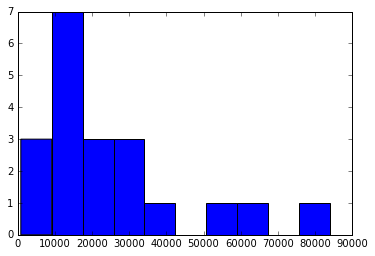

In [302]:
plt.hist(tries)

In [313]:
def mean(x):
    return sum(x) / len(x)
def var(x):
    u = mean(x)
    return sum(map(lambda xi: (xi - u)**2 ,x)) / len(x)
                                       
print 'mean: ', mean(tries)
var = var(tries)
print 'sd: ', str(math.sqrt(var))

mean:  25043
sd:  20921.2540733


### Combos etc

In [286]:
math.factorial(3)

6

In [288]:
allthem = math.factorial(126) / ( math.factorial(12) * math.factorial(126 - 12))

In [290]:
c = 0
for s in list(allthem):
    if 
    allthem[len(allthem)-c]
    c += 1


19470069317824125L

In [293]:
len(list(str(allthem)))  #too many

17

In [ ]:
# you can approximate how many solutions there are by randomly finding them, and seeing how many times they are the same

### Draw Solution : crap below --------

In [17]:
t[0]

(((1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1)),
 ((0, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1)))

In [18]:
t[0][0]

((1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1))

In [19]:
valid2

[((((0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 1, 1)),
   ((0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 1))),
  0,
  0,
  (0, 3, 0),
  10,
  (54, 72, 90, 55, 73, 91, 56, 74, 92, 57, 75, 93, 58, 76, 94, 59, 77, 95)),
 ((((0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1)),
   ((0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0))),
  0,
  0,
  (0, 6, 0),
  9,
  (108,
   126,
   144,
   109,
   127,
   145,
   110,
   128,
   146,
   111,
   129,
   147,
   112,
   130,
   148,
   113,
   131,
   149)),
 ((((0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0)),
   ((0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0))),
  0,
  0,
  (0, 9, 0),
  11,
  (162,
   180,
   198,
   163,
   181,
   199,
   164,
   182,
   200,
   165,
   183,
   201,
   166,
   184,
   202,
   167,
   185,
   203)),
 ((((0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 1, 1), (0, 0, 1, 1, 1, 1)),
   ((0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0))),
  0,
  0,
  (3, 0, 0)

In [20]:
# z: orientation => 0: stout, 6longx3high ; 1: tall: 3longx6high
#valid2: (tile, flip,tileside,xyz,indt, (xyt's))
#flip = 180 degree rotation
valid2 = map(lambda v: ( v[0], v[1], v[2], v[3],v[4], xyt(v) ) ,valid)

In [21]:
valid2[0]

((((0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 1, 1)),
  ((0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 1))),
 0,
 0,
 (0, 3, 0),
 10,
 (54, 72, 90, 55, 73, 91, 56, 74, 92, 57, 75, 93, 58, 76, 94, 59, 77, 95))

In [22]:
mywin = [55, 42, 116, 77, 40, 123, 18, 32, 108, 103, 63, 6]

In [23]:
win1 = [valid2[i][4] for i in mywin]
win1

[10, 8, 9, 2, 1, 7, 3, 6, 0, 5, 11, 4]

In [24]:
valid3 = []
for w in mywin:
    v= valid2[w]

    x,y,z =  v[3][0], v[3][1], v[3][2]
    tileside = v[2]
    mytile = v[0][tileside]
    myflip = v[1]    
    #fillborder(z,borders(z), mytile, v[1])
    print mytile
    try:
        mat = fillborder(z,borders(z), mytile[tileside],myflip)
        

    except:
        print w
    
    valid3.append(v[:], mat[:] )

((0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 1, 1))
55


NameError: name 'mat' is not defined

In [25]:
def combine(v3vec):
    
    for tup in v3vec:
        
        v = tup[0]
        x,y,z =  v[3][0], v[3][1], v[3][2]
        tileside = v[2]
        mytile = v[0][tileside]
        myflip = v[1]    
    
        yiter = range(1,4) if z else range(1,7)
        yy = map(lambda a: -2 + ((a-1)/3) + a*3, yiter)
        
        
    return mat
    

In [193]:
valid2[55]

((((0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 1, 1)),
  ((0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 1))),
 1,
 0,
 (0, 0, 0),
 10,
 (0, 18, 36, 1, 19, 37, 2, 20, 38, 3, 21, 39, 4, 22, 40, 5, 23, 41))

In [40]:
valid3 = []
for w in mywin:
    v = valid2[w]
    z = v[3][2]
    mytile = v[0][v[2]]
    x,y,z =  v[3][0], v[3][1], v[3][2]
    myflip = v[1]    
    
    
    print "TILE:", str(v[4]), "z:", z, " xy: ",(x,y)
    print mytile
    
    print '-------------------------'
    
    tt = fillborder(z,borders(z), mytile, v[1])
    mat = fillborder(z,borders(z), mytile,myflip)
    print tt
    print '-------------------------'
    valid3.append((v,tt))

TILE: 10 z: 0  xy:  (0, 0)
((0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 1, 1))
-------------------------
+---------~---------+
| 1  1  0   0  0  0 |
| 1  1  0   0  0  0 |
| 1  0  0   0  0  0 |
+---------~---------+


-------------------------
TILE: 8 z: 0  xy:  (9, 0)
((0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 1))
-------------------------
+---------~---------+
| 0  0  0   0  0  0 |
| 0  0  0   0  0  0 |
| 0  0  0   0  0  1 |
+---------~---------+


-------------------------
TILE: 9 z: 1  xy:  (15, 0)
((0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0))
-------------------------
+---------+
| 0  0  0 |
| 0  0  0 |
| 0  0  0 |
{         }
| 0  0  0 |
| 0  0  0 |
| 0  0  0 |
+---------+


-------------------------
TILE: 2 z: 1  xy:  (12, 6)
((1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1))
-------------------------
+---------+
| 1  1  1 |
| 1  1  1 |
| 1  1  1 |
{         }
| 1  1  1 |
| 1  1  1 |
| 1  1  1 |
+---------+


-----------------------

In [43]:
mywin

[55, 42, 116, 77, 40, 123, 18, 32, 108, 103, 63, 6]

In [62]:
ysort = valid3[:]

In [63]:
print map(lambda x: x[0][3], ysort)
ysort.sort(key=lambda x: x[0][3][1])
print map(lambda x: x[0][3], ysort)

[(0, 0, 0), (9, 0, 0), (15, 0, 1), (12, 6, 1), (6, 6, 0), (15, 6, 1), (6, 9, 0), (6, 0, 1), (9, 3, 0), (0, 9, 0), (0, 3, 1), (3, 3, 1)]
[(0, 0, 0), (9, 0, 0), (15, 0, 1), (6, 0, 1), (9, 3, 0), (0, 3, 1), (3, 3, 1), (12, 6, 1), (6, 6, 0), (15, 6, 1), (6, 9, 0), (0, 9, 0)]


In [ ]:
#Rules: 
#keep the left most edge
#all right appends overlap leftmost left border
#all bottom appends overlap bottom border


In [64]:
_SYVECS, _SXDOTS


(12, 18)

In [65]:
def ystart(v,y):
    return (v[0][3][1] == y)

In [69]:
vy = filter(lambda v: ystart(v,y), valid3 )
len(vy)

3

In [158]:
def ygood(v,y):
    z = v[0][3][2]
    ystart = v[0][3][1]
    yend = (z+1)*(ystart + 4) + 1
    return ((y < yend) and ( y >= ystart))

In [116]:
ygood(valid3[0],5)

True

In [135]:
vv = valid3[0][1]

In [136]:
vvv = vv.split("\n")

In [138]:
qq = "X"
out = qq[1:] + vvv[0]
out

'+---------~---------+'

In [190]:
def ygood(v,y):
    z = v[0][3][2]
    ystart = v[0][3][1]
    ystart += (ystart /3)
    yend = (z+1)*(ystart + 4) 
    return ((y < yend) and ( y >= ystart))

In [199]:
def ygood2(v,y):
    z = v[0][3][2]
    ystart = v[0][3][1]
    ystart += (ystart /3)
    yend = (z+1)*(ystart + 4) 
    return (ystart,yend,z) if ((y < yend) and ( y >= ystart)) else 0

In [189]:
y = 4
y =  y - ((y+1)/3)
map(lambda v: ygood2(v,y),valid3)

[(0, 4, 0), (0, 4, 0), (0, 8, 1), 0, 0, 0, 0, (0, 8, 1), 0, 0, 0, 0]

In [176]:
y = 4`
y =  y - ((y+1)/3)
len(filter(lambda v: ygood(v,y), valid3))

7

In [200]:
outmat = ""
ylines = 9
#ylines = (_SYVECS / 3) + _SYVECS + 1
for y in range(ylines):
    
    #base_y [0,11] => print-y [0,17]
    base_y = y - ((y+1)/3)
    #print y, base_y
    
    #gather all tiles on this y-line
    ytiles = filter(lambda v: ygood2(v,base_y), valid3)
    
    #sort left to right
    ytiles.sort(key = lambda x: x[0][3][0])
    
    yline = "X"
    for t in ytiles:
        
        tt = t[1]
        tys = tt.split("\n")        
        
        #print tys
        #print printy
        #print tys[printy]
        #print base_y,tys
        yline = yline[:len(yline)-1] + tys[base_y]
        #yline = yline + tys[printy]
        
    print str(y), len(ytiles), yline
        
    outmat += yline
    outmat == "\n"

#print '-------'
#print outmat
    
    

0 4 +---------~---------+---------+---------~---------+---------+
1 4 | 1  1  0   0  0  0 | 0  0  0 | 0  0  0   0  0  0 | 0  0  0 |
2 4 | 1  1  0   0  0  0 | 0  0  0 | 0  0  0   0  0  0 | 0  0  0 |
3 4 | 1  1  0   0  0  0 | 0  0  0 | 0  0  0   0  0  0 | 0  0  0 |
4 4 | 1  0  0   0  0  0 | 0  0  1 | 0  0  0   0  0  1 | 0  0  0 |
5 4 | 1  0  0   0  0  0 | 0  0  1 | 0  0  0   0  0  1 | 0  0  0 |
6 5 {         {         {         +---------~---------{         }
7 5 | 0  0  0 | 0  1  1 | 0  0  1| 0  0  0 |
8 5 | 0  0  0 | 0  1  1 | 0  0  1| 0  0  0 |


In [194]:
valid3[1]

(((((0, 0, 1, 1, 1, 1), (0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 0)),
   ((0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 1))),
  0,
  1,
  (9, 0, 0),
  8,
  (9, 27, 45, 10, 28, 46, 11, 29, 47, 12, 30, 48, 13, 31, 49, 14, 32, 50)),
 '+---------~---------+\n| 0  0  0   0  0  0 |\n| 0  0  0   0  0  0 |\n| 0  0  0   0  0  1 |\n+---------~---------+\n\n')

In [38]:
print len("+---------~---------+")
print len("+---------+")

21
11


In [37]:
#tall = 21 by 5
#stout = 11 by 9

#6 by 3
#3 by 6

11

In [35]:
valid3[1]

(((((0, 0, 1, 1, 1, 1), (0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 0)),
   ((0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 1))),
  0,
  1,
  (9, 0, 0),
  8,
  (9, 27, 45, 10, 28, 46, 11, 29, 47, 12, 30, 48, 13, 31, 49, 14, 32, 50)),
 '+---------~---------+\n| 0  0  0   0  0  0 |\n| 0  0  0   0  0  0 |\n| 0  0  0   0  0  1 |\n+---------~---------+\n\n')

In [27]:
def borders(z):
    """ returns character mat: z0 => 19long by 5high, or z1=> 10long by 7high """
    
    d, s, b, p = "-"," ", "|", "+"
    
    mL, mR = "{", "}"
    dt = "~"
    
    h = p + d*3*3
    if not(z): 
        h+= dt + (d*3*3)
    h+= p + "\n"
    
    hh = "" if z else s
    
    v = b + (s*3*3) + hh 
    if not(z):
        v+= s*3*3
    v += b + "\n"
    
    vv = mL + v[1:len(v)-2] + mR + "\n"
    
    mat = h + (v*3) 
    if z:
        mat += vv + (v*3)
    mat += h
    
    return mat


In [28]:
print borders(1)
print borders(0)

+---------+
|         |
|         |
|         |
{         }
|         |
|         |
|         |
+---------+

+---------~---------+
|                   |
|                   |
|                   |
+---------~---------+



In [29]:
def gettilenum(tx,xx,yy,zz,ff):
    #if flip = -1 -> y can be bigger than x
    flip = -1 if ff else 1
    tt = [x[::flip] for x in tx[::flip]]
    if not(zz):
        out = tt[yy][xx]
    else:    
        out = tt[2-xx][yy]
    return out

In [30]:
print gettilenum(t1,0,0,0,0), gettilenum(t1,5,0,0,0)
print t1

NameError: name 't1' is not defined

In [31]:
def fillborder(z,border,tile,flip):
    
    bmat = border.split("\n")
    tilevec = [subitem for t in tile for subitem in t ]
    
    ymodvec = range(1,4) if not(z) else (range(1,4) + range(5,8))
    xmodrange = range(1,4) if z else range(1,7)
    xmodvec = map(lambda xx: -1 + (xx*3) + ((xx-1)/3), xmodrange  )
    
    mat = ""
    for y,bvec in enumerate(bmat):
        if y in ymodvec:
            vec = ""
            for x,char in enumerate(bvec):
                if x in xmodvec:
                    
                    xx,yy = xmodvec.index(x), ymodvec.index(y)
                    try:
                        vec += str(gettilenum(tile,xx,yy,z,flip))
                    except:
                        print x,y, xx, yy
                else:
                    vec += char
        else:
            vec = bvec
        
        mat += vec  + "\n"
    
    #at.join("\n")
    return mat
    #return tilevec

#[xmodvec.index(x) for x,c in enumerate(bvec) if x in xmodvec ].join("")

In [33]:
print fillborder(0,borders(0),t1,1)
print fillborder(0,borders(0),t1,0)


NameError: name 't1' is not defined

In [242]:
print fillborder(1,borders(1),t1,0)

+---------+
| 0  0  0 |
| 0  0  0 |
| 0  0  0 |
{         }
| 0  0  0 |
| 1  1  0 |
| 1  1  1 |
+---------+


